# 0. Introdução

Nesse Notebook vamos entender as variaveis da nossa base de dados e fazer analises em cima dos dados.

Vamos trabalhar com os dados da Ulist, que esta disponivel na plataforma Kaggle.

As variaveis que vamos trabalhar nesse projeto são:


Attribute | Definition
------------ | -------------
|amostra | vai ser uma numeração crescente dos dados.ex: 1, 2, 3, 4, 5 ...  |     
|id_cliente | número usado pelo cliente na compra |             
|id_unico_cliente | número único dado para cada cliente em função do ip dele, independente da compra |       
|item_id | número de identificação do item comprado |              
|cep_cliente | CEP de moradia ou de entrega do cliente |              
|cidade_cliente | vai ser a cidade de onde foi feito o pedido |          
|estado_cliente | Estado de onde foi feito o pedido |         
|id_pedido | número de identificação da compra |               
|status_pedido | status de entrega ou não do pedido |             
|horario_pedido |  horário e data em que o pedido foi feito |           
|pedido_aprovado | horário e data em que o entregador recebeu o pedido |          
|pedido_entregador | ... |       
|pedido_entregue | data e horário em que o pedido foi entregue |         
|data_estimada |  horário e a data estimada de entrega |            
|id_vendedor | número de identificação do vendedor |               
|preco | preço do produto |                    
|frete | preço do frete |                  
|pagamento_sequencial | caso o cliente faça uma compra utilizando mais de um método de pagamento ele aciona um pagamento sequencial, que vai ser criado para acomodar todas as ordens de pagamento |    
|pagamento_tipo | método de pagamento, se foi boleto, cartão de crédito, cartão de débito |           
|pagamento_prestacoes | número de prestações escolhido pelo cliente |     
|pagamento_valor | o valor pago |          
|review | review de todo o processo |                  
|categoria | categoria do item comprado |                
|categoria_ingles | nome da categoria em inglês |        
|cep_vendedor | CEP do vendedor |             
|cidade_vendedor | cidade do vendedor |        
|estado_vendedor |  Estado do vendedor |          

# 1. Importação das bibliotecas

O primeiro passo para começar os tratamentos é instalar e importar as bibliotecas necessárias.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# 2. Importação dos dados

Importar os dados a partir da base de dados.



In [3]:
df = pd.read_csv('BaseDeDados.csv')

In [4]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [6]:
df.shape

(116581, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

# 3. Análise exploratória dos dados


Aqui vamos fazer algumas analises preliminares para saber como nossos clientes se comportam e assim levantar hipoteses.

In [7]:
def plot_perc(st,dados):
    '''Plota o histograma da variavel st'''

    plt.figure(figsize=(20,8))

    g = sns.countplot(x= st,data=dados,orient='h')
    g.set_ylabel('Contagem',fontsize=17)

    sizes = []

    for p in g.patches:  
        height = p.get_height()  # altura de cada barra
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6,
              height+200,
              '{:1.2f}%'.format(height/116581*100),  # percentual acima da barra
              ha = 'center',va='bottom',fontsize=12)

    g.set_ylim(0,max(sizes)*1.1)

### Clientes por Estado

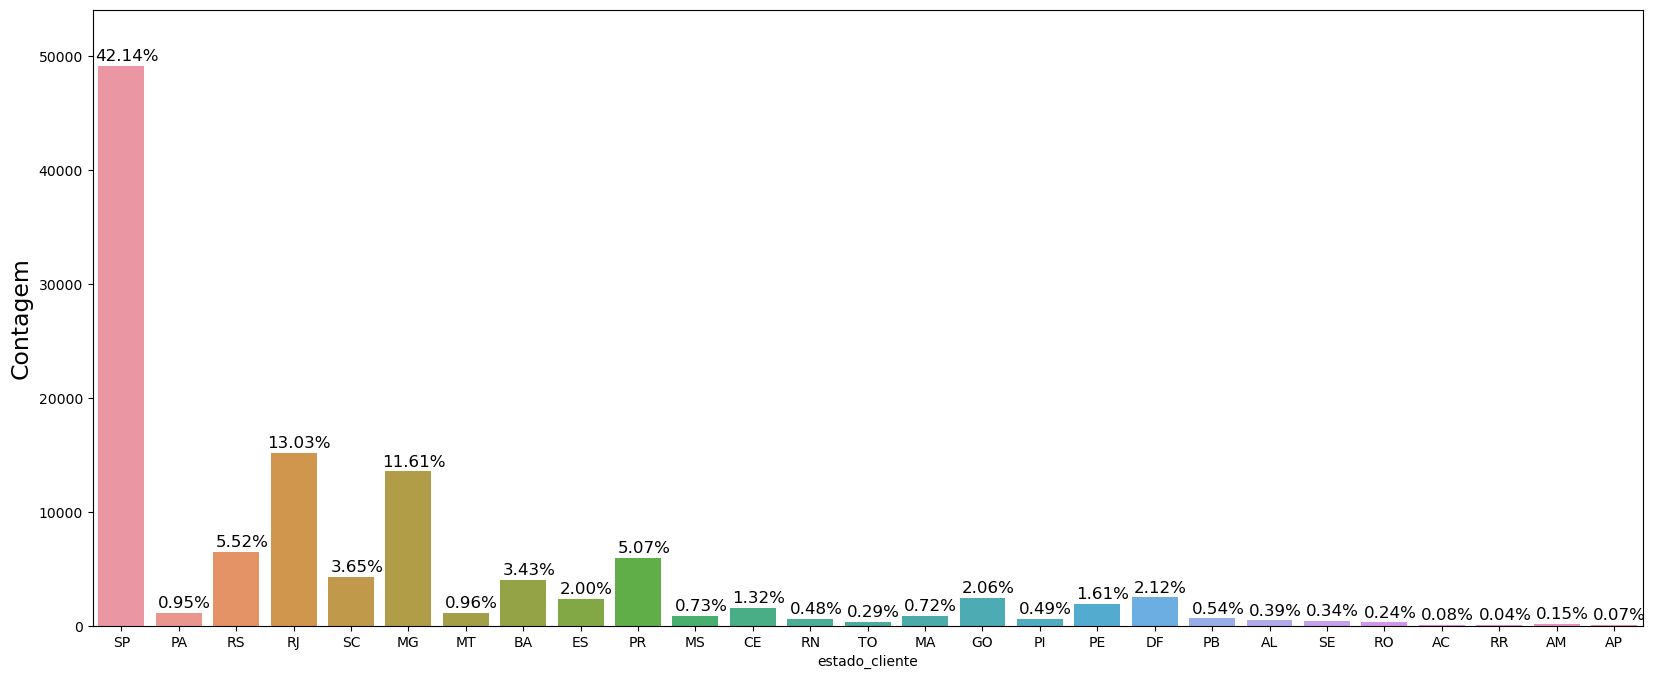

In [8]:
plot_perc('estado_cliente',df)

Vemos que São Paulo é o estado com mais compradores.

### Vendedores por Estado

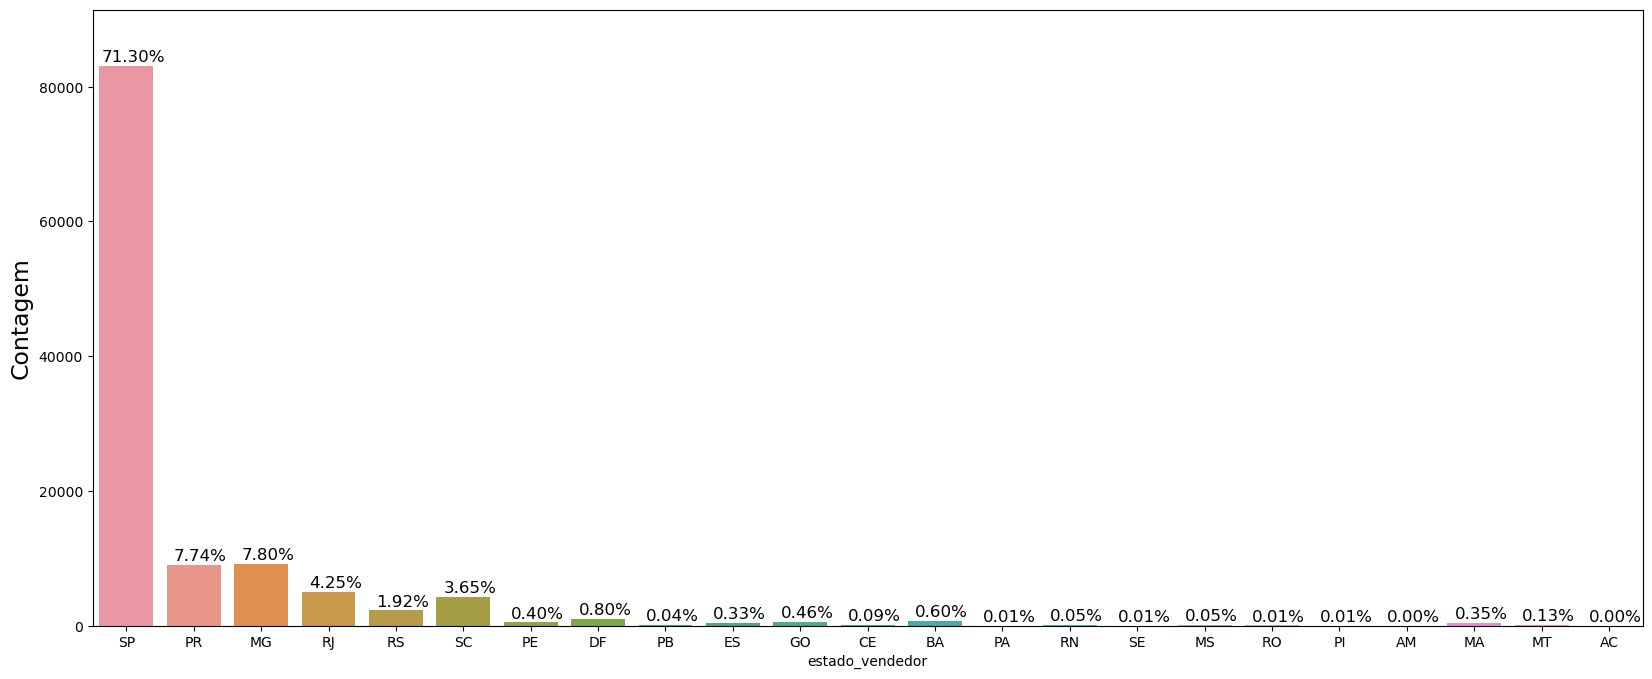

In [9]:
plot_perc('estado_vendedor',df)

Vemos que São Paulo é o estado com mais vendedores. Porém comparando com o numero de compradores (grafico acima) vemos que alguns estados deveriam ter mais vendedores.

### Formas de Pagamento

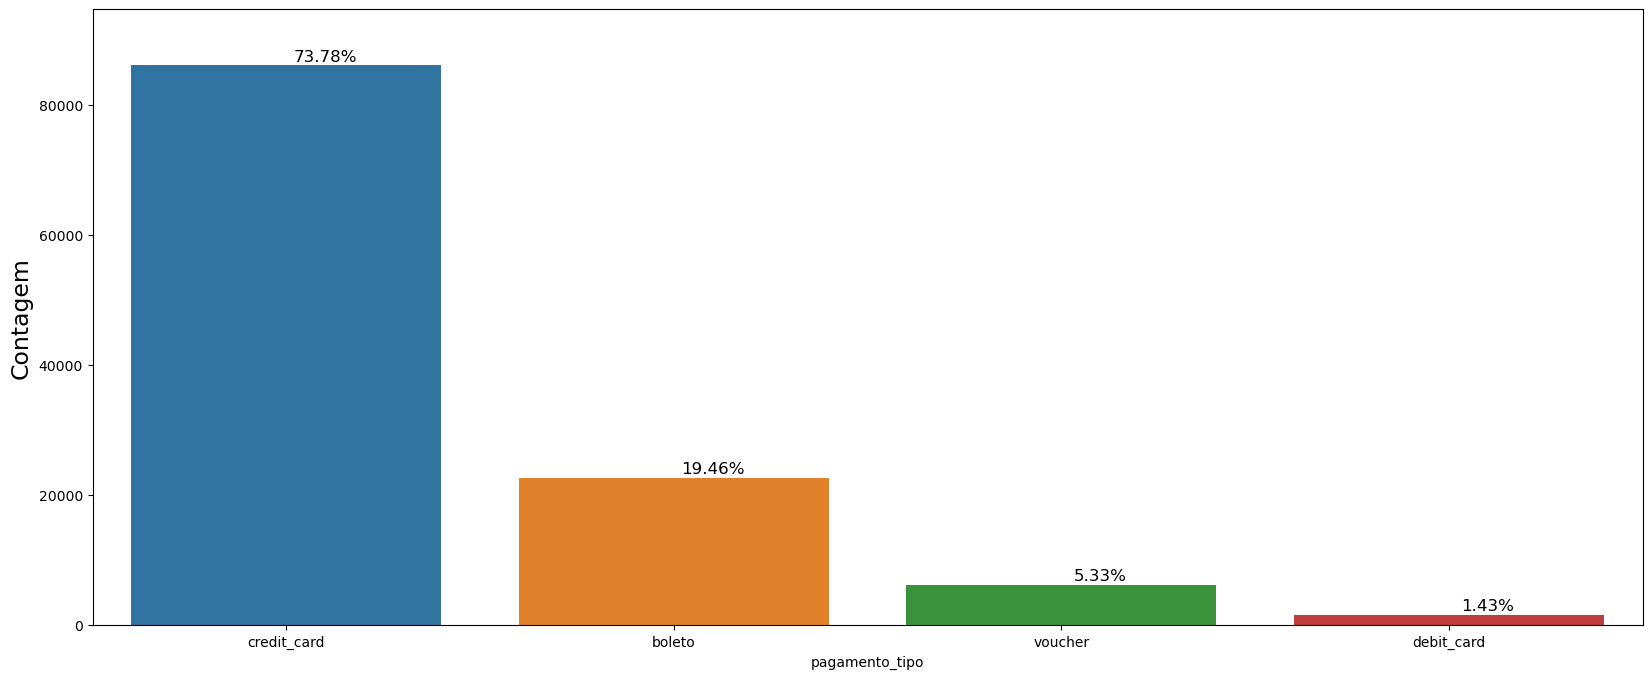

In [10]:
plot_perc('pagamento_tipo',df)

Cartão de credito é a forma mais usada.